In [1]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

In [2]:
# Loading testdata
data = pd.read_csv('testdata_xor.csv')

x = np.mat(data.iloc[:, 0:2].values)
y = np.mat(data.iloc[:, 2:].values)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [34]:
class ClassificationModel():
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W1 = tf.Variable([[10.0, -10.0], [10.0, -10.0]])
        self.b1 = tf.Variable([[-5.0, 15.0]])
        
        self.W2 = tf.Variable([[10.0], [10.0]])
        self.b2 = tf.Variable([[-15.0]])
        
        logits1 = tf.matmul(self.x, self.W1) + self.b1
        self.h = tf.sigmoid(logits1)
        
        logits2 = tf.matmul(self.h, self.W2) + self.b2
        self.f = tf.sigmoid(logits2)
        
        self.loss = tf.losses.sigmoid_cross_entropy(self.y, logits2)

In [35]:
class WrongModel():
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W1 = tf.Variable([[0.0, 0.0], [0.0, 0.0]])
        self.b1 = tf.Variable([[0.0, 0.0]])
        
        self.W2 = tf.Variable([[0.0], [0.0]])
        self.b2 = tf.Variable([[0.0]])
        
        logits1 = tf.matmul(self.x, self.W1) + self.b1
        self.h = tf.sigmoid(logits1)
        
        logits2 = tf.matmul(self.h, self.W2) + self.b2
        self.f = tf.sigmoid(logits2)
        
        self.loss = tf.losses.sigmoid_cross_entropy(self.y, logits2)

In [36]:
# Creating and training model
model = ClassificationModel()
mini_op = tf.train.GradientDescentOptimizer(0.001).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

start = time.time()

for i in range(10000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})
    
end = time.time()
print("Time to run: %.2f" % (end - start))

# Geting Ws, bs and loss from model
W1, W2, b1, b2, loss = session.run([model.W1, model.W2, model.b1, model.b2, model.loss], {model.x: x_test, model.y: y_test})

Time to run: 9.83


In [37]:
# Predicting results from testdata and printing accuracy
temp_preds = session.run([model.f], {model.x: x_test, model.y: y_test})

# Compares observations and predictions (add .5 to observation to get int 0 or 1)
predictions = [int(i) for i in temp_preds[0]+0.5]
ys = y_test

number_correct = sum([int(predictions[x] == ys[x]) for x in range(len(ys))])

print(str(number_correct/len(ys)*100) + '% correct')

100.0% correct


In [38]:
# Print variables
print(W1)
print(W2)
print(b1)
print(b2)
print(loss)

[[ 10. -10.]
 [ 10. -10.]]
[[10.0190735]
 [10.0190735]]
[[-5. 15.]]
[[-15.]]
0.0073531647


<IPython.core.display.Javascript object>


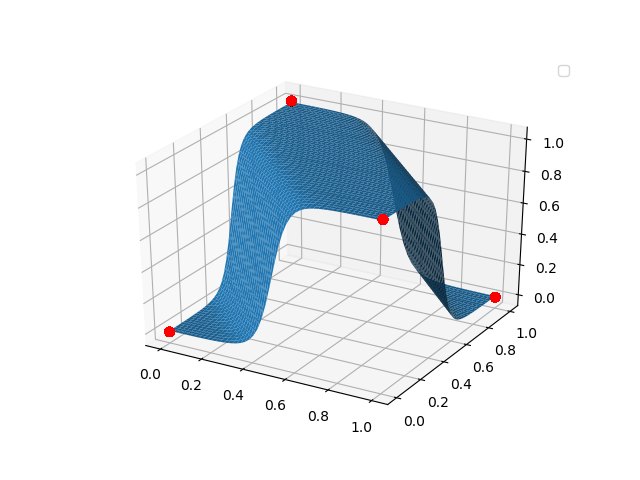

W0828 10:44:21.814955 139660538767168 legend.py:1282] No handles with labels found to put in legend.


In [39]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

x_plot = np.linspace(0,1)
z_plot = np.linspace(0,1)

X, Z = np.meshgrid(x_plot, z_plot)

# y_real = np.mat(  1/(1 +np.e**-(X * W1[0, 0] + Z * W1[1, 0]  + b1[0, 0]) )    ).transpose()

matrix_hell = ([(X*W1[0,0] + Z*W1[1,0]), (X*W1[0,1] + Z*W1[1,1])])


x_matrix_hell_1 = matrix_hell[0] + b1[0,0]
x_matrix_hell_2 = matrix_hell[1] + b1[0,1]

f1_matrix_1 = 1 / (1 + np.e**-(x_matrix_hell_1))
f1_matrix_2 = 1/ (1 + np.e**-(x_matrix_hell_2))

y_real = 1 / (1 + np.e**-( f1_matrix_1 * W2[0,0] +f1_matrix_2 * W2[1,0] + b2[0]    ))

ax.plot_surface(X, Z, y_real)

ax.scatter([x for x in x_test[:, 0]], [y for y in x_test[:, 1]], y_test, c='red', s=40.0)

plt.show()

In [40]:
# Creating and training model
session.close()

model = WrongModel()
mini_op = tf.train.GradientDescentOptimizer(0.001).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

start = time.time()

for i in range(10000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})
    
end = time.time()
print("Time to run: %.2f" % (end - start))

# Geting Ws, bs and loss from model
W1, W2, b1, b2, loss = session.run([model.W1, model.W2, model.b1, model.b2, model.loss], {model.x: x_test, model.y: y_test})

Time to run: 9.77


<IPython.core.display.Javascript object>


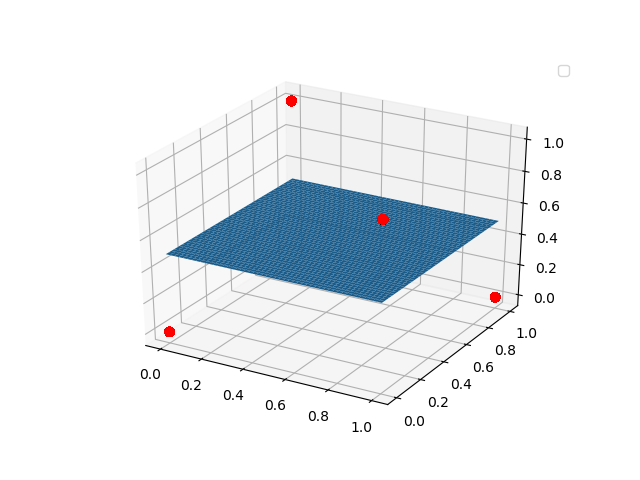

W0828 10:45:59.642311 139660538767168 legend.py:1282] No handles with labels found to put in legend.


In [41]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

x_plot = np.linspace(0,1)
z_plot = np.linspace(0,1)

X, Z = np.meshgrid(x_plot, z_plot)

# y_real = np.mat(  1/(1 +np.e**-(X * W1[0, 0] + Z * W1[1, 0]  + b1[0, 0]) )    ).transpose()

matrix_hell = ([(X*W1[0,0] + Z*W1[1,0]), (X*W1[0,1] + Z*W1[1,1])])


x_matrix_hell_1 = matrix_hell[0] + b1[0,0]
x_matrix_hell_2 = matrix_hell[1] + b1[0,1]

f1_matrix_1 = 1 / (1 + np.e**-(x_matrix_hell_1))
f1_matrix_2 = 1/ (1 + np.e**-(x_matrix_hell_2))

y_real = 1 / (1 + np.e**-( f1_matrix_1 * W2[0,0] +f1_matrix_2 * W2[1,0] + b2[0]    ))

ax.plot_surface(X, Z, y_real)

ax.scatter([x for x in x_test[:, 0]], [y for y in x_test[:, 1]], y_test, c='red', s=40.0)

plt.show()

In [42]:
# Print variables
print(W1)
print(W2)
print(b1)
print(b2)
print(loss)

[[ 3.1897963e-07  3.1897963e-07]
 [-4.7607027e-06 -4.7607027e-06]]
[[0.00069443]
 [0.00069443]]
[[1.2052197e-07 1.2052197e-07]]
[[0.00138877]]
0.6931486
